In [149]:
import math
import random
import matplotlib.pyplot as plt


In [150]:
# Objective function
def objective_function(x, y):
    return (1 * 1.38 * pow(10,-23) * x) / (1.6 * pow(10,-19)) * (math.log(2.54/1e-11) + math.log(y))

# Hill climbing algorithm


In [151]:
x = []
y = []
def hill_climbing(starting_x, starting_y, step_size, bounds,num_iterations):
    current_x = starting_x
    current_y = starting_y
    x.append(current_x)
    y.append(current_y)
    current_objective_value = objective_function(current_x, current_y)
    
    for i in range(num_iterations):
        # Evaluate objective function for neighboring points
        neighbors = [(current_x + random.uniform(0.1,0.3), current_y),
                     (current_x - random.uniform(0.1,0.3), current_y),
                     (current_x, current_y + random.uniform(20, 30)),
                     (current_x, current_y - random.uniform(20, 30))]

        neighbor_values = [objective_function(x, y) for x, y in neighbors]
        

        best_neighbor_value = max(neighbor_values)
        best_neighbor = neighbors[neighbor_values.index(best_neighbor_value)]

        tempX = best_neighbor[0]
        tempy = best_neighbor[1]
        if tempX < bounds[0][0] :
          tempX = bounds[0][0]
        if tempX > bounds[0][1] :
            tempX = bounds[0][1]
        if tempy < bounds[1][0] :
          tempy = bounds[1][0]
        if tempy > bounds[1][1] :
            tempy = bounds[1][1]
        best_neighbor = tempX,tempy
        x.append(best_neighbor[0])
        y.append(best_neighbor[1])
        
        # If the best neighbor has a higher objective value than the current point, move to it
        if best_neighbor_value > current_objective_value:
            current_x, current_y = best_neighbor
            current_objective_value = best_neighbor_value
            
        # Otherwise, return the current point as the result
        else:
            return current_x, current_y,current_objective_value

        
    # If maximum iterations are reached, return the current point as the result
    return current_x, current_y,current_objective_value



In [152]:
bounds = [(283,313),(500,1000)]
X_best,Y_best,obj = hill_climbing(283,700,-1,bounds,10)
print(X_best)
print(Y_best)
print(obj)

283.8205914057583
877.2006062174814
0.808738321259535


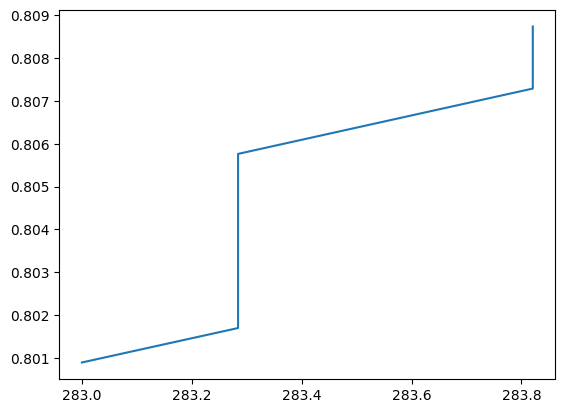

In [153]:
results = [objective_function(x[i],y[i]) for i in range(len(x))]
plt.plot(x,results)
plt.xlabel('temperature')
plt.ylabel('output voltage per cell')

plt.show()

**Variations**

In [154]:
newX = []
newY = []
def New_hill_climbing(starting_x, starting_y, step_size, bounds,num_iterations):
    current_x = starting_x
    current_y = starting_y
    newX.append(current_x)
    newY.append(current_y)
    current_objective_value = objective_function(current_x, current_y)
    
    for i in range(num_iterations):
        # Evaluate objective function for neighboring points
        neighbors = [(current_x + random.uniform(0.1,0.3), current_y),
                     (current_x - random.uniform(0.1,0.3), current_y),
                     (current_x, current_y + random.uniform(20, 30)),
                     (current_x, current_y - random.uniform(20, 30))]

        # neighbor_values = [if objective_function(x, y)>current_objective_value for x, y in neighbors]
        neighbor_values = []
        for x,y in neighbors:
          if objective_function(x,y)> current_objective_value:
            neighbor_values.append((x,y))
          
        

        best_neighbor = neighbor_values[random.randint(0,len(neighbor_values)-1)]
        # print(best_neighbor)
        tempx = best_neighbor[0]
        tempy = best_neighbor[1]
        best_neighbor_value = objective_function(tempx,tempy)

        tempX = best_neighbor[0]
        tempy = best_neighbor[1]
        if tempX < bounds[0][0] :
          tempX = bounds[0][0]
        if tempX > bounds[0][1] :
            tempX = bounds[0][1]
        if tempy < bounds[1][0] :
          tempy = bounds[1][0]
        if tempy > bounds[1][1] :
            tempy = bounds[1][1]
        best_neighbor = tempX,tempy
        newX.append(best_neighbor[0])
        newY.append(best_neighbor[1])
        
        # If the best neighbor has a higher objective value than the current point, move to it
        if best_neighbor_value > current_objective_value:
            current_x, current_y = best_neighbor
            current_objective_value = best_neighbor_value
            
        # Otherwise, return the current point as the result
        else:
            return current_x, current_y,current_objective_value

        
    # If maximum iterations are reached, return the current point as the result
    return current_x, current_y,current_objective_value



In [155]:
New_X_best,New_Y_best,New_obj = New_hill_climbing(283,700,-1,bounds,10)
print(New_X_best)
print(New_Y_best)
print(New_obj)

283.5791536274974
876.5385834985924
0.8080318855666492


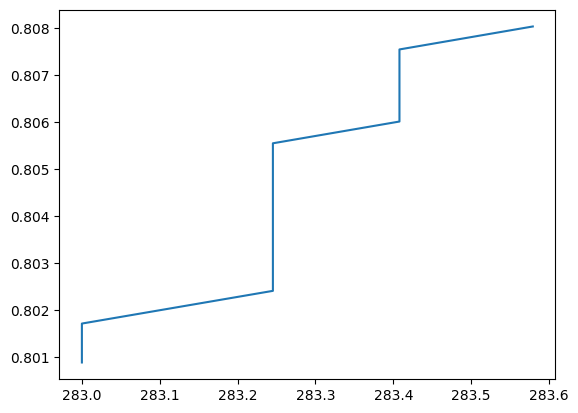

In [156]:
newResults = [objective_function(newX[i],newY[i]) for i in range(len(newX))]
plt.plot(newX,newResults)
plt.xlabel('temperature')
plt.ylabel('output voltage per cell')
plt.show()